In [1]:
import collections
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("text_data.csv")

In [3]:
dataset = dataset.sample(frac=1)
dataset.head()

,title,body,category
100,need a monitor,monitor hello dear moved location tower monito...,5
179,scam received please block the sender domain,scam received please hi received attached plea...,4
232,password reset for,hi having issues his unable his imperative he ...,4
112,audio and video calls all conference rooms,re audio video calls rooms dear please kind sc...,5
43,wants to access requesting it hardware equipment,wants requesting hardware equipment monitor ac...,4


In [4]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\2117787\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\2117787\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
REMOVE_NUM = re.compile('[\d+]')
STOPWORDS = set(stopwords.words('english'))

In [6]:
def clean_text(text):
    """
    text: a string
    return: modified initial string
    """
    # lowercase text
    text = text.lower() 

    # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    
    # Remove the XXXX values
    text = text.replace('x', '') 
    
    # Remove white space
    text = REMOVE_NUM.sub('', text)

    #  delete symbols which are in BAD_SYMBOLS_RE from text
    text = BAD_SYMBOLS_RE.sub('', text) 

    # delete stopwords from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    
    # removes any words composed of less than 2 or more than 21 letters
    text = ' '.join(word for word in text.split() if (len(word) >= 2 and len(word) <= 21))

    # Stemming the words
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    
    return text

In [7]:
dataset["body"] = dataset["body"].apply(clean_text)
dataset["body"]

100    monitor hello dear move locat tower monitor co...
179    scam receiv pleas hi receiv attach pleas kind ...
232    hi issu unabl imper finish variou work help ma...
112    audio video call room dear pleas kind schedul ...
43     want request hardwar equip monitor accept decl...
434    pleas action submit card good morn regularli o...
113         carrier chang dear pleas chang confirm thank
299    public hi client ne current work function impl...
199    hi ad two role unfortun pleas look forward tha...
50     monitor share mailbo hello pleas creation shar...
68     pleas cancel incid duplic hello pleas incid ca...
427    pleas help confluenc si save convers convers t...
157    confluenc hi everyon help confluenc scienc tha...
418    rule duck hello integr rule modern order user ...
260                              hi pleas regard develop
295    test batteri rack floor hello pleas advis chan...
140    area clean hello pleas kind log asset attach r...
130    hello kindli ask help am

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# sublinear_df is set to True to use a logarithmic form for frequency
# min_df is the minimum numbers of documents a word must be present in to be kept
# norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1
# ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams
# stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features
vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
X_train_vc = vectorizer.fit_transform(dataset["body"])

df1 = pd.DataFrame(X_train_vc.toarray(), columns=vectorizer.get_feature_names())

In [16]:
df1.shape

(450, 261)

In [17]:
dataset["title"] = dataset["title"].apply(clean_text)
dataset["title"]

100                                         need monitor
179                 scam receiv plea block sender domain
232                                       password reset
112                         audio video call confer room
43                     want access request hardwar equip
434                                 miss time card notif
113                                carrier chang request
299                                               public
199                                               access
50                                  monitor share mailbo
68                              plea cancel incid duplic
427                         password reset etern contact
157                                     confluenc access
418                        rule modern black duck integr
260                               access develop project
295                     notif test batteri rack th floor
140                                  area clean en phone
130                            

In [18]:
vectorizer1 = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
X1_train_vc = vectorizer1.fit_transform(dataset["title"])

df2 = pd.DataFrame(X1_train_vc.toarray(), columns=vectorizer1.get_feature_names())

In [19]:
df2.shape

(450, 30)

In [25]:
df3 = pd.concat([df1,df2], axis=1)

In [26]:
df3.shape

(450, 291)

In [27]:
k_clusters = 3

model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=0)
model.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=1e-06, verbose=0)

In [28]:
clusters = model.predict(df3)

In [29]:
clusters

array([2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 0, 2, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2,

In [30]:
dataset["ClusterName"] = (clusters)
dataset.head(20)

,title,body,category,ClusterName
100,need monitor,monitor hello dear move locat tower monitor co...,5,2
179,scam receiv plea block sender domain,scam receiv pleas hi receiv attach pleas kind ...,4,2
232,password reset,hi issu unabl imper finish variou work help ma...,4,2
112,audio video call confer room,audio video call room dear pleas kind schedul ...,5,2
43,want access request hardwar equip,want request hardwar equip monitor accept decl...,4,0
434,miss time card notif,pleas action submit card good morn regularli o...,4,2
113,carrier chang request,carrier chang dear pleas chang confirm thank,4,2
299,public,public hi client ne current work function impl...,6,2
199,access,hi ad two role unfortun pleas look forward tha...,4,0
50,monitor share mailbo,monitor share mailbo hello pleas creation shar...,4,2


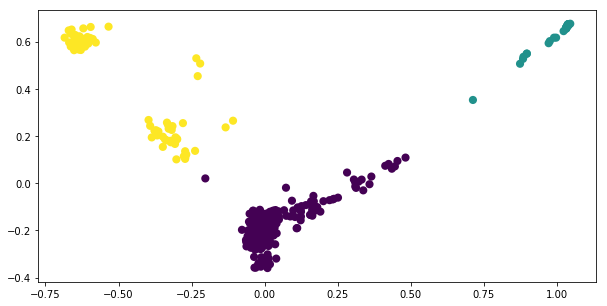

In [34]:
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(df3)
kmeans = KMeans(n_clusters=k_clusters, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)


plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=10, cmap='viridis', linewidths=5)



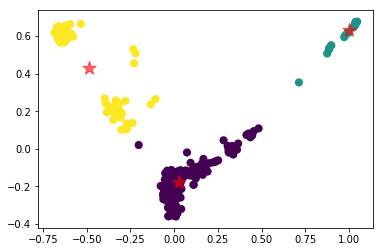

In [35]:
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=10, cmap='viridis', linewidths=5)

centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='red',marker='*', s=200, alpha=0.6);

In [ ]:
# taking category as the 

In [36]:
n = dataset.shape[0]

In [37]:
category = dataset['category']

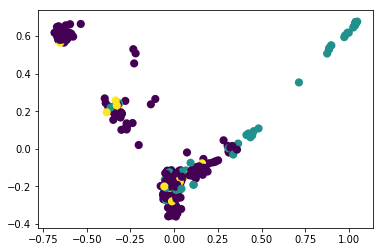

In [38]:
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=category, s=10, cmap='viridis', linewidths=5)

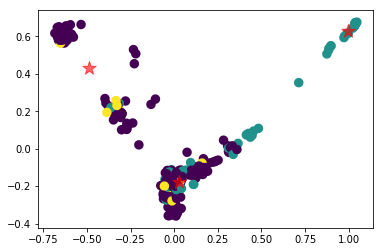

In [39]:
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=category, s=20, cmap='viridis', linewidths=5)

centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='red',marker='*', s=200, alpha=0.6);